<a href="https://colab.research.google.com/github/rajeevak40/Retail_Analytics/blob/main/Purchase_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pickle

# Data Import



In [2]:
# Loading data
df_purchase=pd.read_csv('/content/drive/MyDrive/Retail/purchase data.csv', index_col=0)


# Data Exploration

In [3]:
# Data Inspection
df_purchase.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Check for missing Vlaue
df_purchase.isnull().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

# Data Segmentation

## Import modles from Segmentation

In [5]:
scaler= pickle.load(open('/content/drive/MyDrive/Retail/scaler.pickle','rb'))

pca= pickle.load(open('/content/drive/MyDrive/Retail/pca.pickle','rb'))
kmean_pca= pickle.load(open('/content/drive/MyDrive/Retail/kmean_pca.pickle','rb'))


In [6]:
df_purchase.columns.values

array(['Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size'],
      dtype=object)

## Standardization of data

In [7]:
df_features= df_purchase[['Sex', 'Marital status', 'Age','Education', 'Income', 'Occupation', 'Settlement size']]
df_features.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0
200000001,0,0,47,1,110866,1,0


In [8]:
df_purchase_segm_std=scaler.transform(df_features)
df_purchase_segm_std

array([[-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  9.46616002e-01, ...,
        -2.64792791e-01,  2.96823025e-01, -9.09729514e-01],
       ...,
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01],
       [-9.17398837e-01, -9.93024329e-01,  5.19866384e-01, ...,
        -2.20975210e-04,  2.96823025e-01, -9.09729514e-01]])

## PCA

In [9]:
df_purchase_segm_pca=pca.transform(df_purchase_segm_std)
df_purchase_segm_pca.shape

(58693, 7)

## KMeans PCA

In [10]:
kmean_pca.fit(df_purchase_segm_pca)

KMeans(n_clusters=4, random_state=42)

In [11]:
purchase_segm_pca_kmean = kmean_pca.predict(df_purchase_segm_pca)
purchase_segm_pca_kmean

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [12]:
df_purchase_predictors= df_purchase.copy()
df_purchase_predictors['Segment']= purchase_segm_pca_kmean

In [13]:
df_purchase_predictors =df_purchase_predictors.reset_index()

# Descriptive Analysis by Segments

## Data Analysis of customers

In [14]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,2.66,0,1,0,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,2.66,0,0,0,0,0,0,0,47,1,110866,1,0,2


In [15]:
# Preparing temp dataset to analyse data sement wise.

temp_1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID']).count()
temp_2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID']).sum()
temp_3 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID']).mean()
#temp_1= temp_1.set_index('ID')
#temp_2= temp_2.set_index('ID')
#temp_3= temp_3.set_index('ID')
temp_1= temp_1.rename(columns={'Incidence': 'No_of_Visit'})
temp_2= temp_2.rename(columns={'Incidence': 'No_of_Purchase'})
temp_4=pd.concat([temp_1,temp_2,temp_3], axis=1)
temp_4['Avg_No_Purchase']= temp_4['No_of_Purchase']/temp_4['No_of_Visit']
print(temp_4.head())

           No_of_Visit  No_of_Purchase  Segment  Avg_No_Purchase
ID                                                              
200000001          101               9        2         0.089109
200000002           87              11        1         0.126437
200000003           97              10        2         0.103093
200000004           85              11        2         0.129412
200000005          111              13        3         0.117117


## Segment Proportion

In [16]:
# Segment Proportion
segm_prop= temp_4[['No_of_Purchase','Segment']].groupby(['Segment']).count()/temp_4.shape[0]
segm_prop=segm_prop.rename(columns={'No_of_Purchase' :'Segment Proportion'})
segm_prop.head()

,Segment Proportion
Segment,
0,0.294
1,0.192
2,0.310
3,0.204


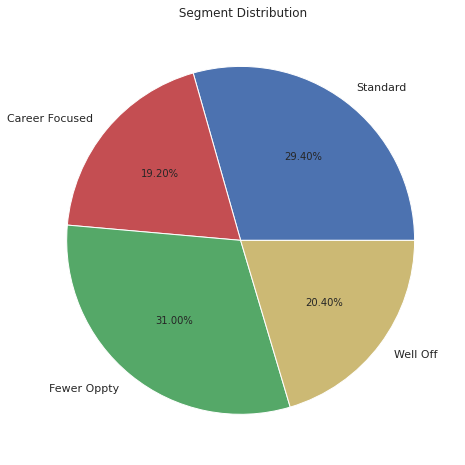

In [17]:
# Setting on pie plot
plt.figure(figsize=(10,8))
plt.pie(segm_prop['Segment Proportion'], labels =['Standard','Career Focused', 'Fewer Oppty', "Well Off"], autopct='%1.2f%%', colors= ['b','r','g','y'] )
plt.title(" Segment Distribution")
plt.show()

## Purchase Occasion & Incidence

Working on distribution on purchase occasions and purchase incidences. Hence Mean and Stdev segment wiese need to computed.

In [18]:
temp_4.head()

,No_of_Visit,No_of_Purchase,Segment,Avg_No_Purchase
ID,,,,
200000001,101,9,2,0.089109
200000002,87,11,1,0.126437
200000003,97,10,2,0.103093
200000004,85,11,2,0.129412
200000005,111,13,3,0.117117


In [19]:
segment_mean=temp_4.groupby(['Segment']).mean()
segment_mean.head()

,No_of_Visit,No_of_Purchase,Avg_No_Purchase
Segment,,,
0,115.387755,22.809524,0.200114
1,117.197917,34.843750,0.286459
2,114.516129,23.348387,0.205028
3,124.803922,42.362745,0.297449


In [20]:
segment_std=temp_4.groupby(['Segment']).std()
segment_std.head()

,No_of_Visit,No_of_Purchase,Avg_No_Purchase
Segment,,,
0,17.725629,12.670391,0.108776
1,20.903598,26.116068,0.173007
2,16.662952,14.462488,0.124453
3,46.415907,56.027184,0.209008


### Plotting them on bar chart for visualisation

In [21]:
segment_mean.index.values

array([0, 1, 2, 3])

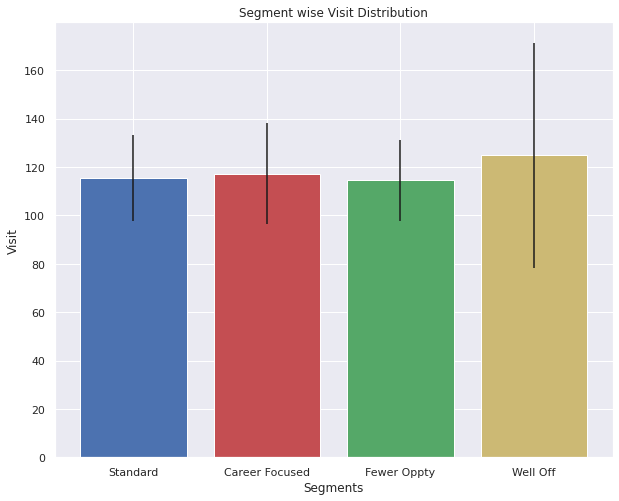

In [22]:
#from matplotlib import ticker
plt.figure(figsize=(10,8))
plt.bar(x=(0,1,2,3), tick_label= ['Standard','Career Focused', 'Fewer Oppty', "Well Off"], 
        height=segment_mean['No_of_Visit'], yerr=segment_std['No_of_Visit'], color=['b','r','g','y'])
plt.title('Segment wise Visit Distribution')
plt.xlabel('Segments')
plt.ylabel('Visit')
plt.show()

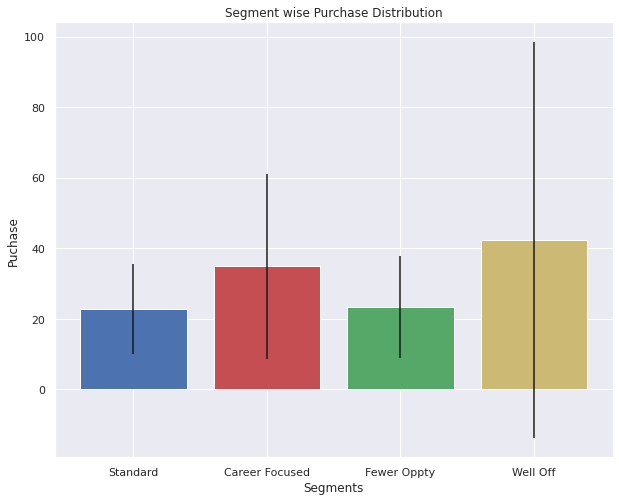

In [23]:
plt.figure(figsize=(10,8))
plt.bar(x=(0,1,2,3), tick_label= ['Standard','Career Focused', 'Fewer Oppty', "Well Off"], 
        height=segment_mean['No_of_Purchase'], yerr=segment_std['No_of_Purchase'], color=['b','r','g','y'])
plt.title('Segment wise Purchase Distribution')
plt.xlabel('Segments')
plt.ylabel('Puchase')

plt.show()

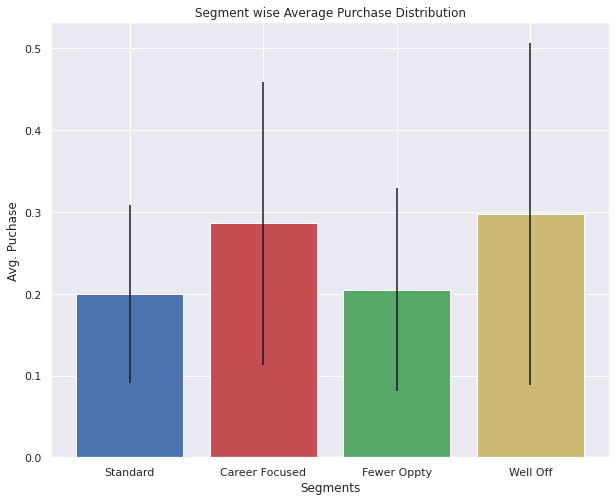

In [24]:
plt.figure(figsize=(10,8))
plt.bar(x=(0,1,2,3), tick_label= ['Standard','Career Focused', 'Fewer Oppty', "Well Off"], 
        height=segment_mean['Avg_No_Purchase'], yerr=segment_std['Avg_No_Purchase'], color=['b','r','g','y'])
plt.title('Segment wise Average Purchase Distribution')
plt.xlabel('Segments')
plt.ylabel('Avg. Puchase')
plt.show()

### Brand Choice Analysis

In [25]:
# Create puchase incidence dataframe
df_purchase_incidence= df_purchase_predictors[df_purchase_predictors['Incidence']==1]
df_purchase_incidence.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,2


In [26]:
# Create Dummy Variable for Brand 
df_brand_dummy=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand', prefix_sep='_')
df_brand_dummy['Segment'], df_brand_dummy['ID']=df_purchase_incidence['Segment'],df_purchase_incidence['ID']
df_brand_dummy.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001


In [27]:
# Groping by ID followed bt Segment
temp= df_brand_dummy.groupby(['ID']).mean()
segment_brand_choice= temp.groupby(['Segment']).mean()
segment_brand_choice.head()

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
Segment,,,,,
0,0.215311,0.486921,0.114515,0.063796,0.119456
1,0.042368,0.116830,0.029867,0.612163,0.198773
2,0.128701,0.665053,0.022835,0.070556,0.112854
3,0.081670,0.111416,0.041458,0.109559,0.655896


In [38]:
temp.head(10)

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment
ID,,,,,,
200000001,0.111111,0.444444,0.0000,0.222222,0.222222,2
200000002,0.000000,0.090909,0.0000,0.909091,0.000000,1
200000003,0.000000,0.800000,0.0000,0.000000,0.200000,2
200000004,0.000000,0.090909,0.0000,0.000000,0.909091,2
200000005,0.000000,0.000000,0.0000,0.000000,1.000000,3
200000006,0.100000,0.100000,0.0000,0.000000,0.800000,3
200000007,0.062500,0.500000,0.1875,0.062500,0.187500,3
200000008,0.000000,0.800000,0.0000,0.000000,0.200000,2
200000009,0.111111,0.888889,0.0000,0.000000,0.000000,2


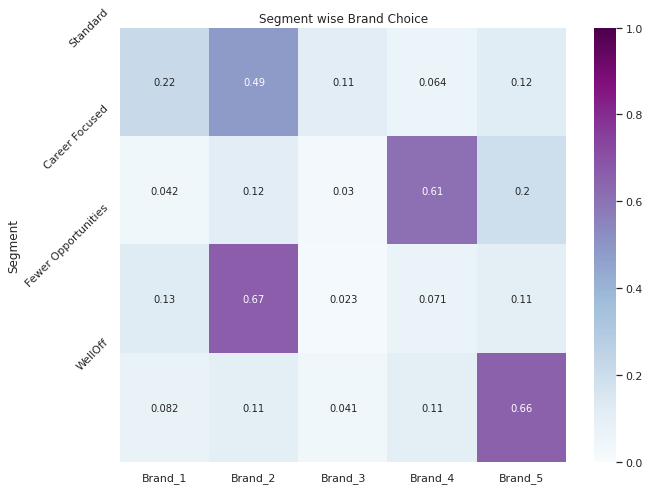

In [28]:
# Visualise the data via heatmap
plt.figure(figsize=(10,8))
sns.heatmap(segment_brand_choice,vmin=0,vmax=1,cmap='BuPu', annot=True )
plt.yticks([0,1,2,3], ['Standard', 'Career Focused', 'Fewer Opportunities', 'WellOff'], rotation=45)
plt.title('Segment wise Brand Choice')
plt.show()

### Revenue computation
Computation on Revenue for each brand

In [29]:
df_purchase_incidence.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Promotion_1,Promotion_2,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,2.09,2.67,0,0,0,0,0,0,0,47,1,110866,1,0,2
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,2.12,2.62,1,0,0,0,1,0,0,47,1,110866,1,0,2
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,1.97,2.67,0,0,0,1,0,0,0,47,1,110866,1,0,2
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,2.16,2.68,1,1,0,0,0,0,0,47,1,110866,1,0,2
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,1.89,2.37,1,0,0,1,1,0,0,47,1,110866,1,0,2


In [30]:
no_of_brands=len(df_purchase_incidence['Brand'].unique())
print(f"No of Brands :",no_of_brands )

No of Brands : 5


In [ ]:

#for ind in df_purchase_incidence.index:
  price='Price_'+str(df_purchase_incidence['Brand'][ind])
  rev_brand='Revenue_Brand_'+str(df_purchase_incidence['Brand'][ind])
  df_purchase_incidence[rev_brand]=df_purchase_incidence['Quantity']*df_purchase_incidence[price]


In [60]:
#df_purchase_incidence.head()

In [61]:
df_rev_dummy=pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand', prefix_sep='_')
df_rev_dummy['Segment'], df_rev_dummy['ID'],df_rev_dummy['Quantity'], df_rev_dummy['Price_1'],df_rev_dummy['Price_2'],df_rev_dummy['Price_3'], df_rev_dummy['Price_4'], df_rev_dummy['Price_5'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID'],df_purchase_incidence['Quantity'], df_purchase_incidence['Price_1'],df_purchase_incidence['Price_2'],df_purchase_incidence['Price_3'],df_purchase_incidence['Price_4'], df_purchase_incidence['Price_5']
df_rev_dummy['Brand_Rev_1']=df_rev_dummy['Brand_1']*df_rev_dummy['Quantity']*df_rev_dummy['Price_1']
df_rev_dummy['Brand_Rev_2']=df_rev_dummy['Brand_2']*df_rev_dummy['Quantity']*df_rev_dummy['Price_2']
df_rev_dummy['Brand_Rev_3']=df_rev_dummy['Brand_3']*df_rev_dummy['Quantity']*df_rev_dummy['Price_3']
df_rev_dummy['Brand_Rev_4']=df_rev_dummy['Brand_4']*df_rev_dummy['Quantity']*df_rev_dummy['Price_4']
df_rev_dummy['Brand_Rev_5']=df_rev_dummy['Brand_5']*df_rev_dummy['Quantity']*df_rev_dummy['Price_5']
df_rev_dummy.head()


,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID,Quantity,Price_1,Price_2,Price_3,Price_4,Price_5,Brand_Rev_1,Brand_Rev_2,Brand_Rev_3,Brand_Rev_4,Brand_Rev_5
6,0,1,0,0,0,2,200000001,2,1.50,1.90,1.99,2.09,2.67,0.00,3.80,0.0,0.00,0.00
11,0,0,0,0,1,2,200000001,1,1.39,1.90,1.91,2.12,2.62,0.00,0.00,0.0,0.00,2.62
19,1,0,0,0,0,2,200000001,2,1.47,1.90,1.99,1.97,2.67,2.94,0.00,0.0,0.00,0.00
24,0,0,0,1,0,2,200000001,1,1.21,1.35,1.99,2.16,2.68,0.00,0.00,0.0,2.16,0.00
29,0,1,0,0,0,2,200000001,3,1.46,1.88,1.97,1.89,2.37,0.00,5.64,0.0,0.00,0.00


In [70]:
temp=df_rev_dummy[['Segment','Brand_Rev_1','Brand_Rev_2','Brand_Rev_3','Brand_Rev_4','Brand_Rev_5']]
temp=temp.groupby(['Segment']).sum()
temp['Total Revenue']=temp['Brand_Rev_1']+temp['Brand_Rev_2']+temp['Brand_Rev_3']+temp['Brand_Rev_4']+temp['Brand_Rev_5']
temp=temp.rename(index={0:'Standard', 1:'Career Focused', 2:'Fewer Opportunities', 3:'Well Off'})
#temp=temp.groupby(['Segment']).mean()
temp

,Brand_Rev_1,Brand_Rev_2,Brand_Rev_3,Brand_Rev_4,Brand_Rev_5,Total Revenue
Segment,,,,,,
Standard,3041.64,7589.19,4031.54,1173.45,2550.09,18385.91
Career Focused,698.12,1267.78,719.36,13970.40,5489.58,22145.24
Fewer Opportunities,1825.46,11628.57,624.12,1633.51,2080.27,17791.93
Well Off,740.43,1282.77,646.50,2262.74,19501.06,24433.50
